# Classifying IMDB movie reviews

In [5]:
import pandas as pd
import utils
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [3]:
movies = pd.read_csv("IMDB_Dataset.csv")
movies.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# Relabeling the 'sentiment' column as 0's and 1's
movies['sentiment'] = movies['sentiment'].map({'positive': 1, 'negative': 0})
movies.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [10]:
# Create word features (limit to top 5000 words for efficiency)
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(movies['review'])
y = movies['sentiment']

In [11]:
# Train logistic regression (linear model for interpretable weights)
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
# Get feature names (words) and their coefficients
# Note, if using a newer version of scikit-learn, change get_feature_names with get_feature_names_out
feature_names = vectorizer.get_feature_names()
word_weights = model.coef_[0]  # Weights for positive sentiment

# Create DataFrame of words and their sentiment scores
word_sentiments = pd.DataFrame({
    'word': feature_names,
    'weight': word_weights
})

# Sort words by sentiment strength
most_positive = word_sentiments.sort_values('weight', ascending=False).head(10)
most_negative = word_sentiments.sort_values('weight').head(10)

In [15]:
print(most_positive)
print(most_negative)

             word    weight
3622   refreshing  1.899814
2637     likewise  1.637537
1718        felix  1.520356
1781     flawless  1.488304
4348     superbly  1.448350
579   brilliantly  1.395715
3619     referred  1.391103
936     complaint  1.357469
4936  wonderfully  1.335610
934      complain  1.309109
                word    weight
4239         stinker -2.454930
2968           mst3k -2.250751
1823     forgettable -2.165641
4840           waste -2.103975
4688   uninteresting -2.043142
1313  disappointment -2.036565
4709     unwatchable -1.908155
3135            olds -1.886194
2878          mildly -1.796697
4685      uninspired -1.741430


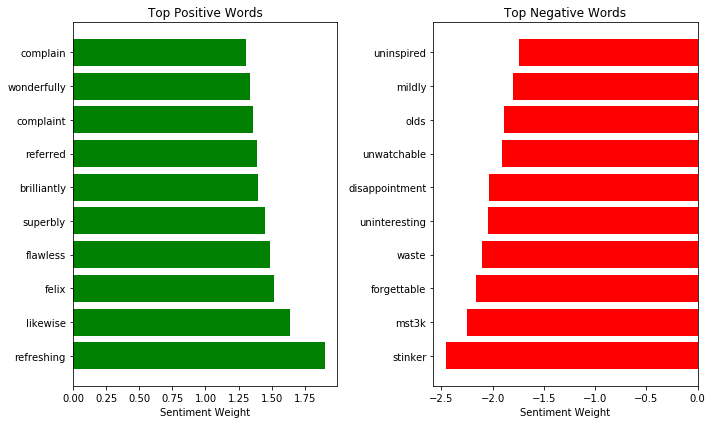

In [16]:
# Plot top positive/negative words
plt.figure(figsize=(10, 6))

# Positive words
plt.subplot(121)
plt.barh(most_positive['word'], most_positive['weight'], color='green')
plt.title('Top Positive Words')
plt.xlabel('Sentiment Weight')

# Negative words
plt.subplot(122)
plt.barh(most_negative['word'], most_negative['weight'], color='red')
plt.title('Top Negative Words')
plt.xlabel('Sentiment Weight')

plt.tight_layout()
plt.show()